In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
display(data_merge.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
num_mice_merged = data_merge["Mouse ID"].nunique()
num_mice_merged


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_merge[data_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = data_merge[data_merge["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_merge[~data_merge["Mouse ID"].isin(duplicate_mice_ids)]
display(clean_data.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
num_mice_merged = clean_data["Mouse ID"].nunique()
num_mice_merged

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean",
    "median",
    "var",
    "std",
    "sem"
])

summary_stats.columns = (
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
)

summary_stats

 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats = clean_data.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)
advanced_summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


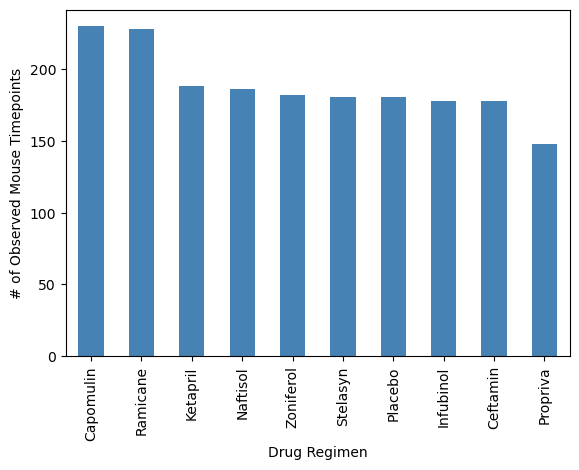

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoint_count = clean_data["Drug Regimen"].value_counts()
mouse_timepoint_count.plot(kind="bar", figsize=(6.5,4.5), color='steelblue')

# labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=90)
plt.show()

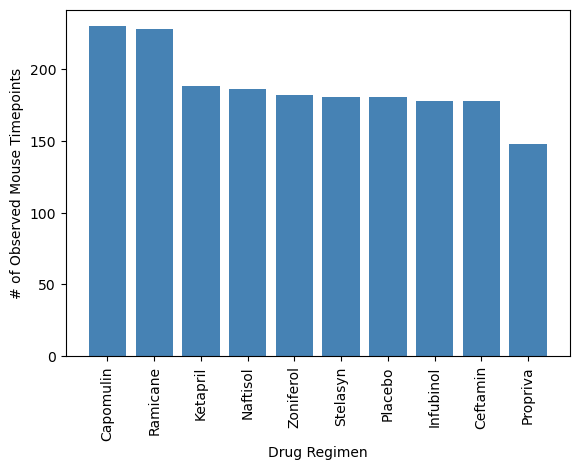

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's pyplot
plt.figure(figsize=(6.5, 4.5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='steelblue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)  
plt.show()

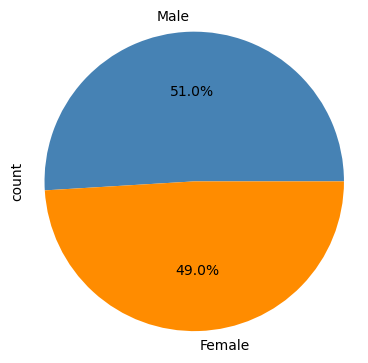

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_data['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(4.25, 4.25))
gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'darkorange'], startangle=0)

plt.ylabel('count')  
plt.axis('equal')  
plt.show()

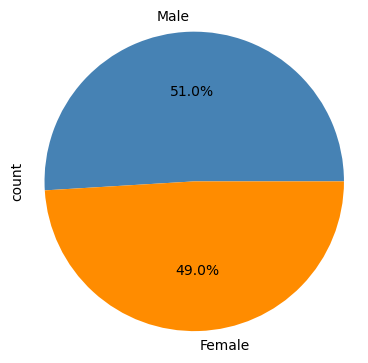

In [20]:

# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_data['Sex'].value_counts()
male_count = gender_count.get('Male', 0)
female_count = gender_count.get('Female', 0)


# Make the pie chart

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['steelblue', 'darkorange']

plt.figure(figsize=(4.25, 4.25))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.ylabel('count')  
plt.axis('equal')

plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"], how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    treatment_data = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset
    
    tumor_vol_data.append(treatment_data)
    
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
  
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}\n")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



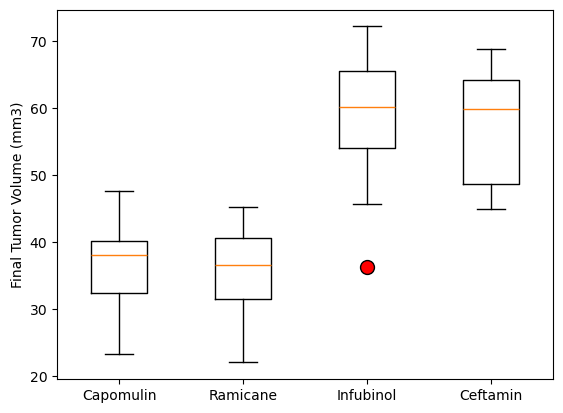

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o', markersize=10))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

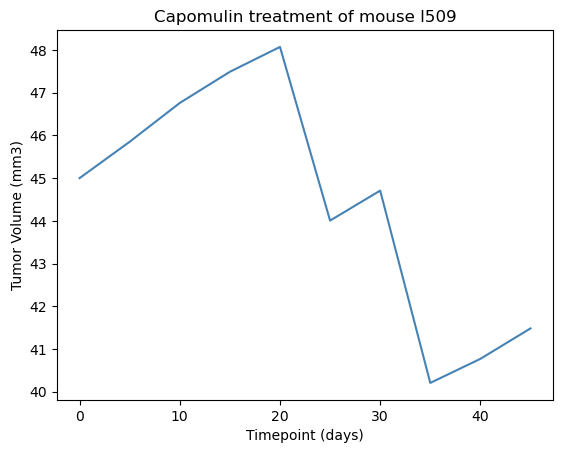

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='steelblue')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')


plt.show()


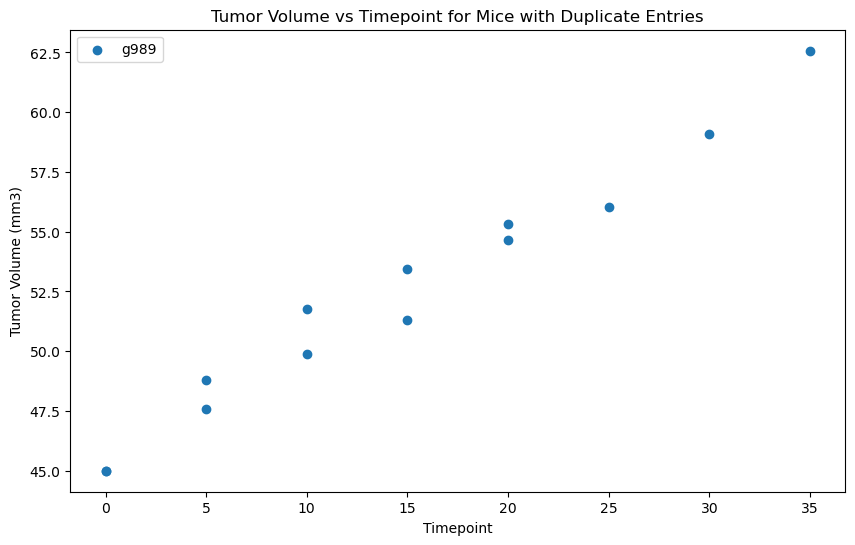

In [16]:

# Optional: Visualize the duplicate data
if len(duplicate_mice_ids) > 0:
    plt.figure(figsize=(10, 6))
    for mouse_id in duplicate_mice_ids:
        mouse_data = duplicate_mouse_data[duplicate_mouse_data["Mouse ID"] == mouse_id]
        plt.scatter(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], label=mouse_id)
    plt.xlabel("Timepoint")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title("Tumor Volume vs Timepoint for Mice with Duplicate Entries")
    plt.legend()
    plt.show()